In [1]:
import numpy as np
def change_dp(coins):
    """
    
    """
    coins = sorted(coins)
    values = [100] * 100
    values[0] = 0
    values[1] = 1
    for i in range(1, 100):
        for coin in coins:
            prev_index = i - coin
            if prev_index < 0:
                continue
            this_way = values[prev_index] + 1
            values[i] = min(this_way, values[i])
    return values

In [2]:
lookups = {}
for i in range(2, 100):
    for j in range(i+1, 100):
        for k in range(j+1, 100):
            change = [1, i, j, k]
            lookups[(i,j,k)] = change_dp(change)
            

In [6]:
kvs = [(k,v) for k,v in lookups.items()]
kvs = sorted(kvs, key=lambda x: np.sum(x[1]))

In [4]:
kvs[0][0], np.mean(kvs[0][1][1:]), np.max(kvs[0][1][1:])

((5, 18, 29), 3.9292929292929295, 6)

Text(0.5,0,'Currency Rank')

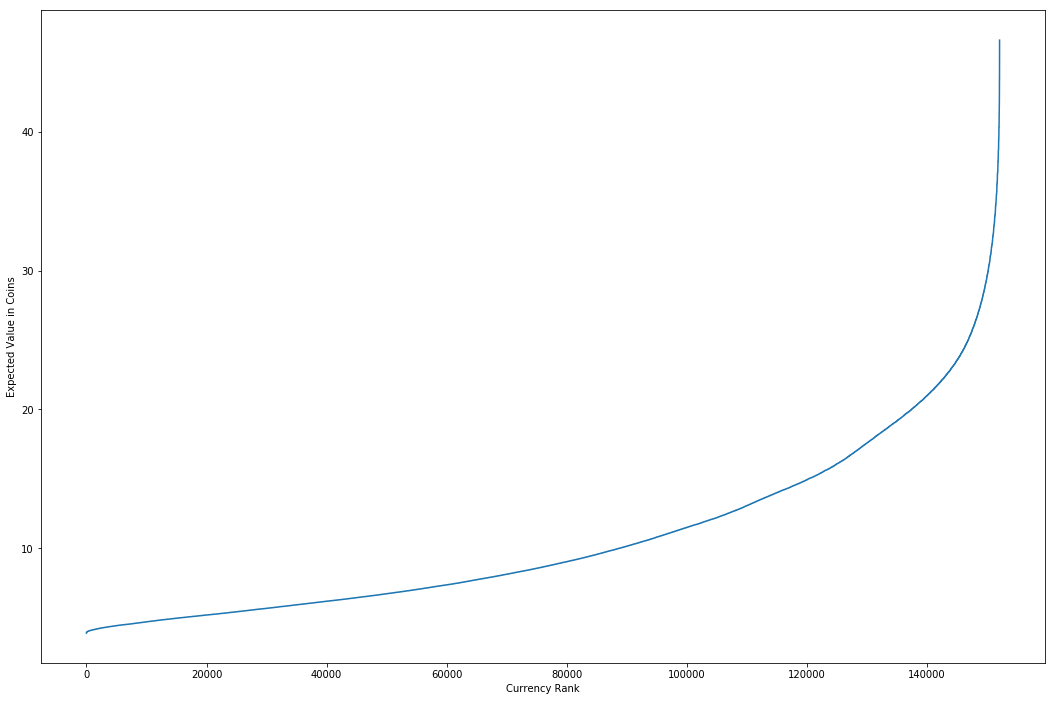

In [10]:
# Lets see how expected value returned shifts with currency rank.
# At a certain point the currencies are just bad and shoot up
import matplotlib.pyplot as plt
%matplotlib inline
ranks = list(range(len(kvs)))
evs = [np.mean(x[1]) for x in kvs]
plt.figure(figsize=(18,12))
plt.plot(ranks, evs)
plt.ylabel("Expected Value in Coins")
plt.xlabel("Currency Rank")

In [7]:
kvs = sorted(kvs, key=lambda x: np.max(x[1]))
kvs = sorted(kvs, key=lambda x: np.sum(x[1]))

Text(0.5,0,'Currency Rank')

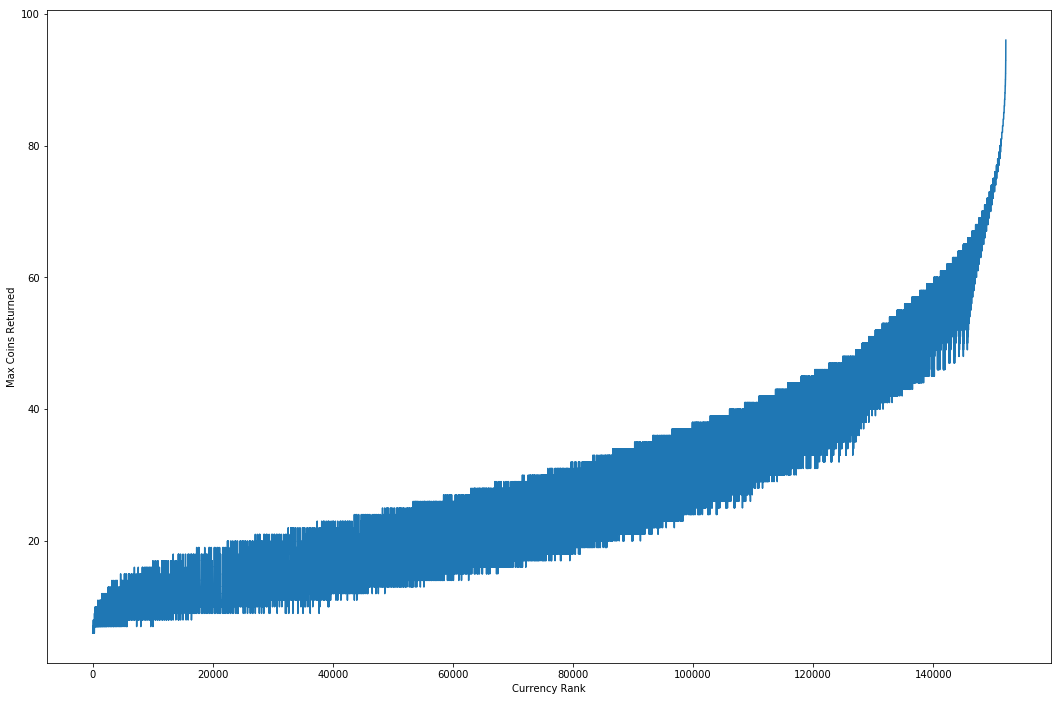

In [9]:
# Lets see how max coins returned shifts with currency rank.
# The function seems to shoot up in the same way
# interesting that max coins is so different for similar expected values
max_coins = [np.max(x[1]) for x in kvs]
plt.figure(figsize=(18,12))
plt.plot(ranks, max_coins)
plt.ylabel("Max Coins Returned")
plt.xlabel("Currency Rank")

Text(0.5,0,'Expected Value')

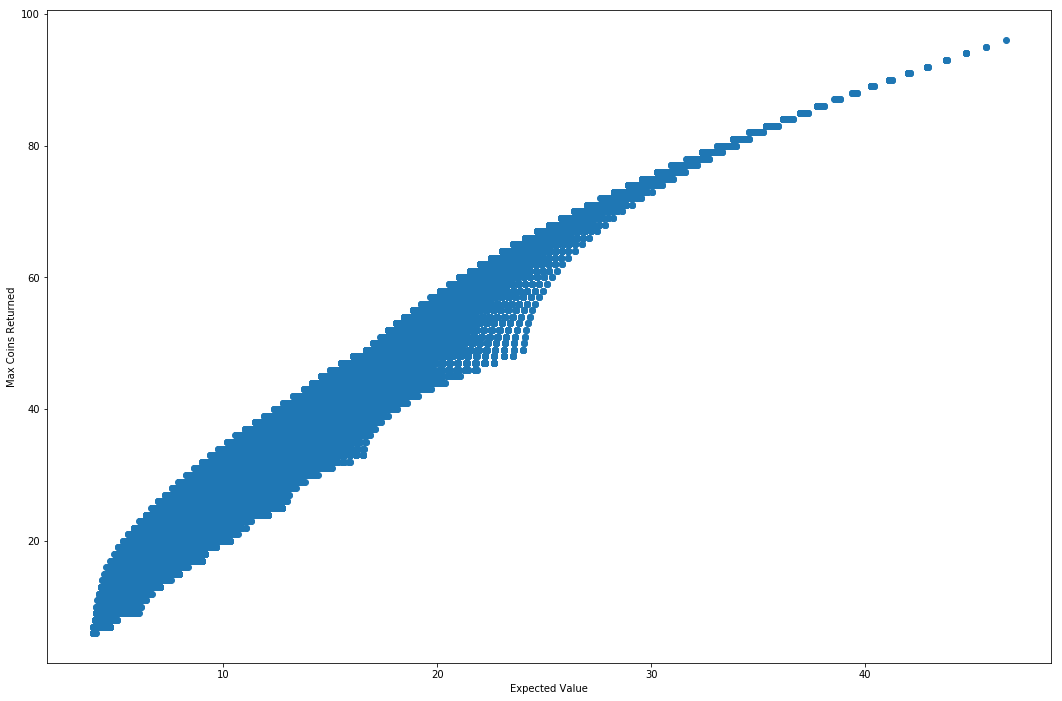

In [11]:
# Lets view max coins with respect to expected value
# We have some interesting arcs which I think show a coin value
# getting closer and closer to an exact multiple decreasing the max
max_coins = [np.max(x[1]) for x in kvs]
plt.figure(figsize=(18,12))
plt.scatter(evs, max_coins)
plt.ylabel("Max Coins Returned")
plt.xlabel("Expected Value")